In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 
import seaborn as sns


In [33]:
df=pd.read_csv('/kaggle/input/ecommerce-customers/Ecommerce Customers.csv')

In [34]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [35]:
df.shape

(500, 8)

In [36]:
df.describe()#not useful with categorical data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [38]:
#check null values
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [39]:
sns.set_palette("viridis")
sns.set_style('whitegrid')

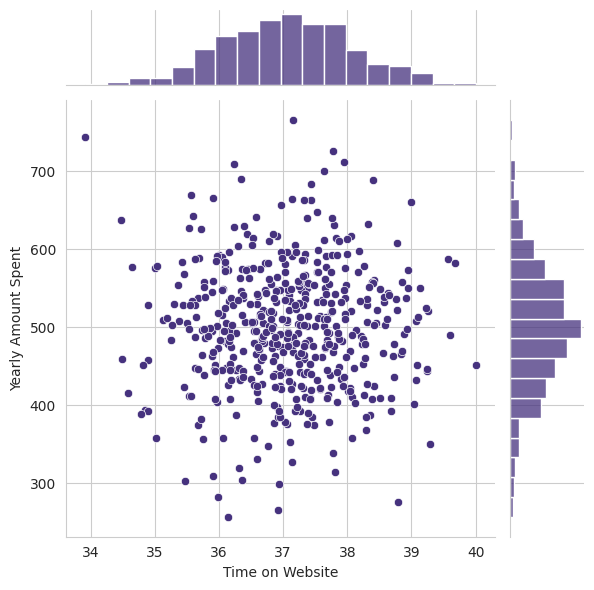

In [40]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)

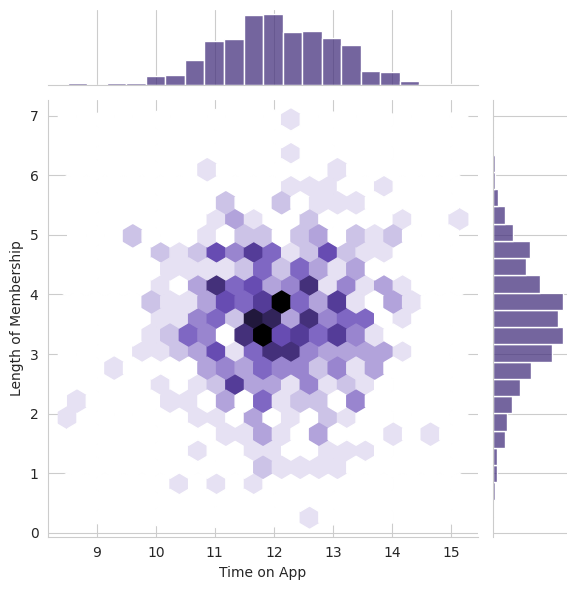

In [41]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=df)

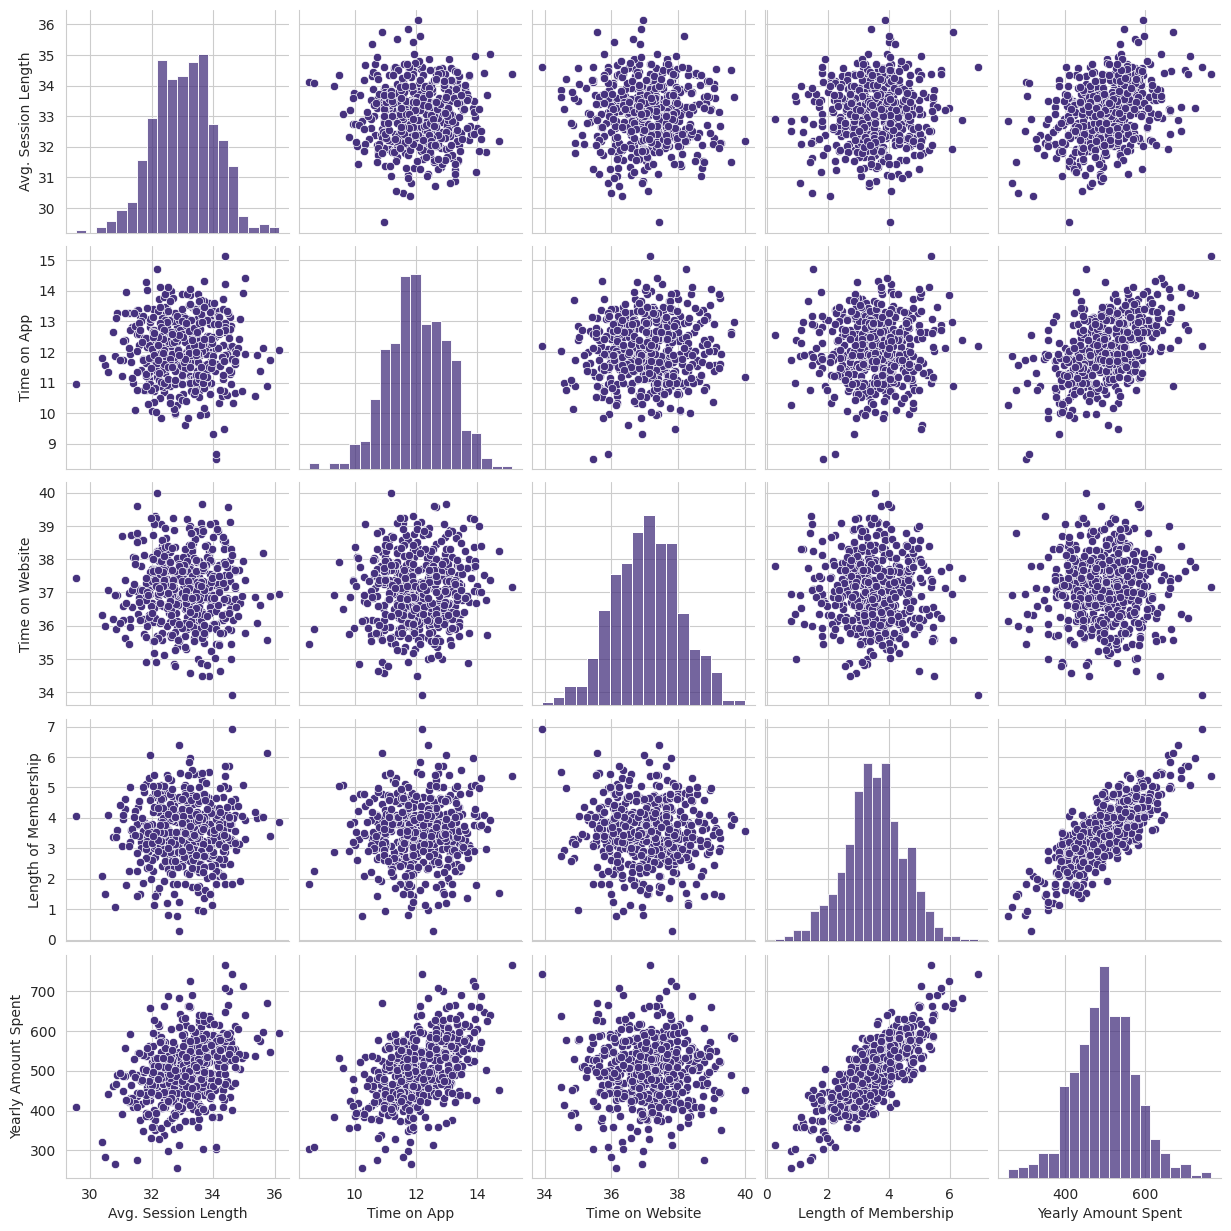

In [42]:
sns.pairplot(df)

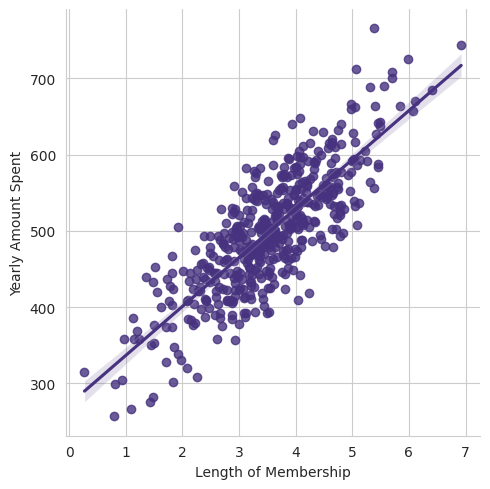

In [43]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

In [44]:
#Now that we've explored the data a bit, let's go ahead and split the data into 
#training and testing sets. Set a variable X equal to the numerical features of 
#the customers and a variable y equal to the "Yearly Amount Spent" column.
y = df['Yearly Amount Spent']
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [45]:
#Use model_selection.train_test_split from sklearn to split the data into trainig

from sklearn.model_selection import train_test_split
#30% testing, 70% trainig

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
from sklearn.linear_model import LinearRegression

#Create an instance of a LinearRegression() model named lm.
lm = LinearRegression()


In [47]:
#Train/fit lm on the training data.
lm.fit(X_train,y_train)

LinearRegression()

In [48]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [49]:
#Predicting Test Data
#Now that we have fit our model, 
#let's evaluate its performance by predicting off the test values!
#Use lm.predict() to predict off the X_test set of the data.

predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

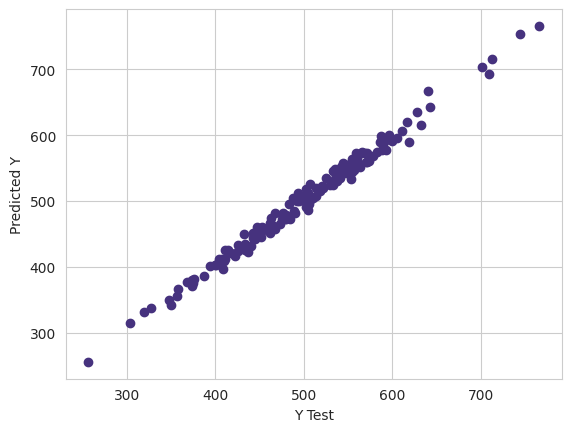

In [50]:
#Create a scatterplot of the real test values versus the predicted values. 

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [51]:
#Let's evaluate our model performance by calculating the residual 
#sum of squares and the explained variance score (R^2).
#Calculate the Mean Absolute Error, Mean Squared Error, and the 
#Root Mean Squared Error. 

# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

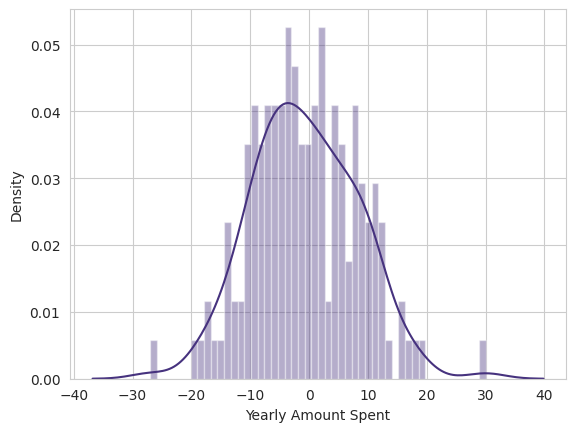

In [52]:
#Plot a histogram of the residuals and make sure it looks normally distributed.
sns.distplot((y_test-predictions),bins=50)

In [53]:
#Recreate the dataframe below.

coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
